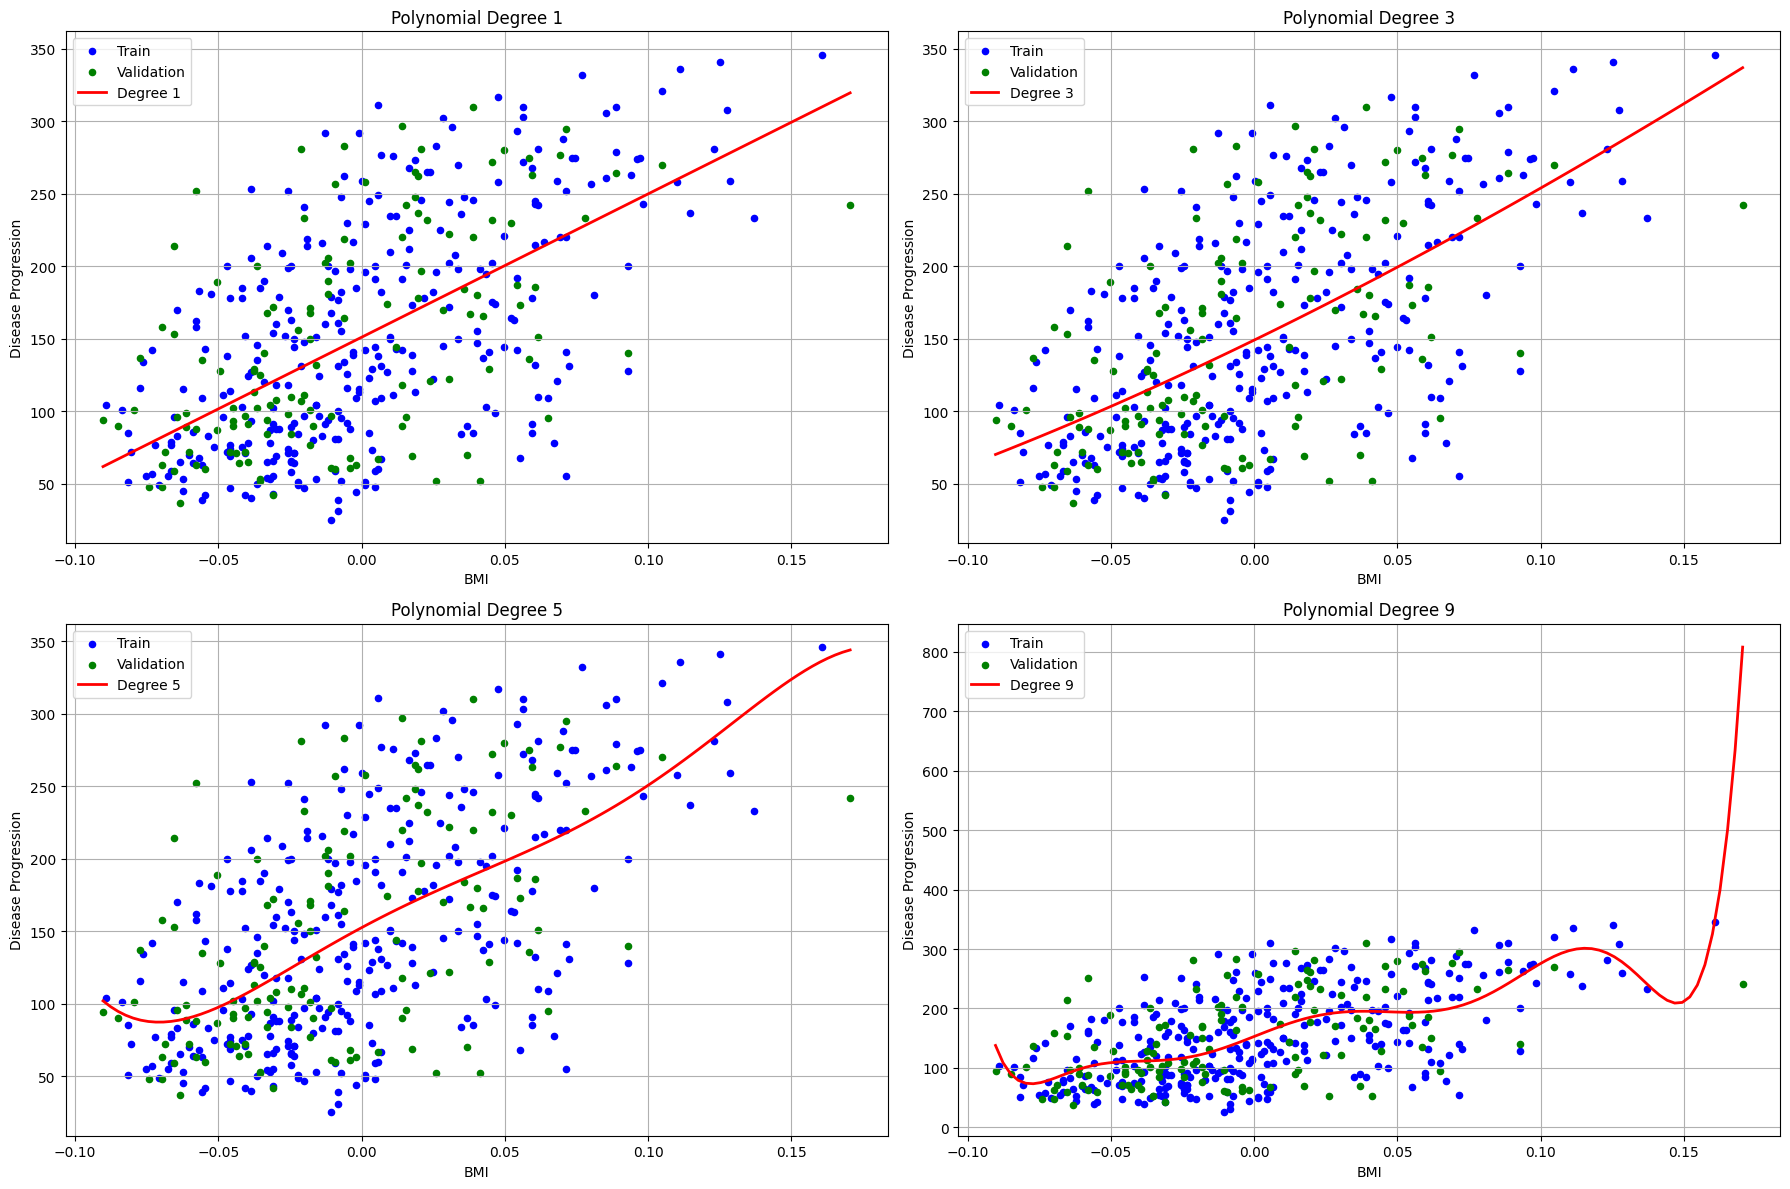

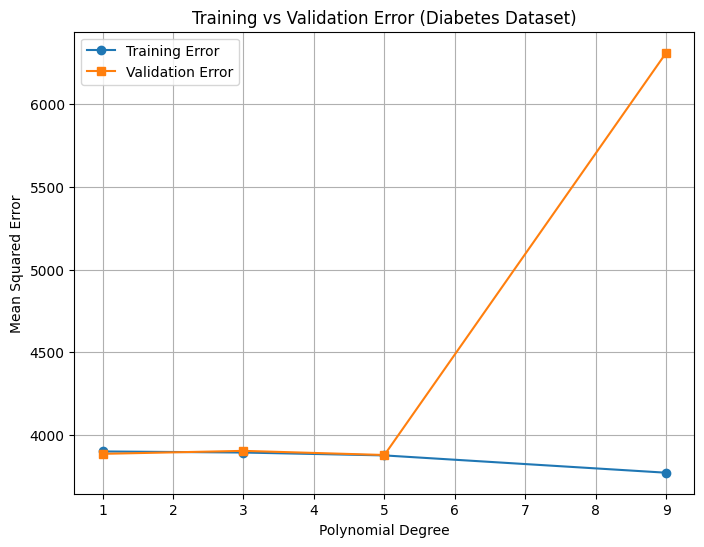

In [4]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. Load Diabetes dataset (regression task)
data = load_diabetes()
X = data.data[:, 2].reshape(-1, 1)  # Using BMI as a feature for simplicity
y = data.target

# 3. Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create polynomial regression models with increasing complexity (degrees)
degrees = [1, 3, 5, 9]
train_errors = []
val_errors = []

plt.figure(figsize=(18, 12))

# 5. Train models with increasing polynomial degree
for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

    # 6. Plot model fit
    plt.subplot(2, 2, i)
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_train, y_train, label="Train", color='blue', s=20)
    plt.scatter(X_val, y_val, label="Validation", color='green', s=20)
    plt.plot(X_plot, y_plot, color='red', label=f"Degree {degree}", linewidth=2)
    plt.title(f"Polynomial Degree {degree}")
    plt.xlabel("BMI")
    plt.ylabel("Disease Progression")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 7. Plot training vs validation error
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, val_errors, marker='s', label='Validation Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Error (Diabetes Dataset)')
plt.legend()
plt.grid(True)
plt.show()
